In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyblock

In [2]:
# OA = positive peptide
strands=["OA","OB"]
# Hexvalues for plots below
peptide_colors = ["#FFE4E1","#CD5C5C","#CD2626","#BFEFFF","#00BFFF","#104E8B"]
# System names for plots below
#sys=["pkG_peG","pkA_peA","pkL_peL","pkkg_peeg","pkka_peea","pkkl_peel"]
x_labels = ['(Kg)₁₅+(Eg)₁₅','(Ka)₁₅+(Ea)₁₅','(Kl)₁₅+(El)₁₅','(KkGkKg)₅+(EeGeEg)₅','(KkAkKa)₅+(EeAeEa)₅','(KkLkKl)₅+(EeAeEa)₅']
data=[]

# 6 peptide systems
for i in range(6):
    tmp = pd.read_csv(str(i)+"_com_dist.out",delim_whitespace=True,header=None)
    # Just keep data values (get rid of "Frame :" part)
    tmp = tmp[2]
    if i>2:
        tmp2 = pd.read_csv(str(i)+"_com_dist2.out",delim_whitespace=True,header=None)
        tmp2 = tmp2[2]
        tmp =  pd.Series([*tmp, *tmp2])
    data.append(tmp)#.iloc[:,1:4:2])
    
    
data[0] #pkG

0      11.056952
1       5.314888
2       6.140154
3       4.521894
4       1.729017
         ...    
545     8.147751
546     9.394602
547     8.778502
548     7.781656
549     6.577285
Name: 2, Length: 550, dtype: float64

In [3]:
def time_plot(data, subplot_n, title, colors, xlabel, ylabel):
    
    figure, axis = plt.subplots(subplot_n)
    figure.tight_layout(pad=1.0)

    for i in range(subplot_n):
        axis[i].plot(data[i], color=colors[i])
        axis[i].set_title(title[i],fontsize=10, x=0.90, y=1.0)
        axis[i].set_ylabel(xlabel)
        axis[i].set_xlabel(ylabel)
    #plt.savefig("COM_timeseries1.png",dpi=600)

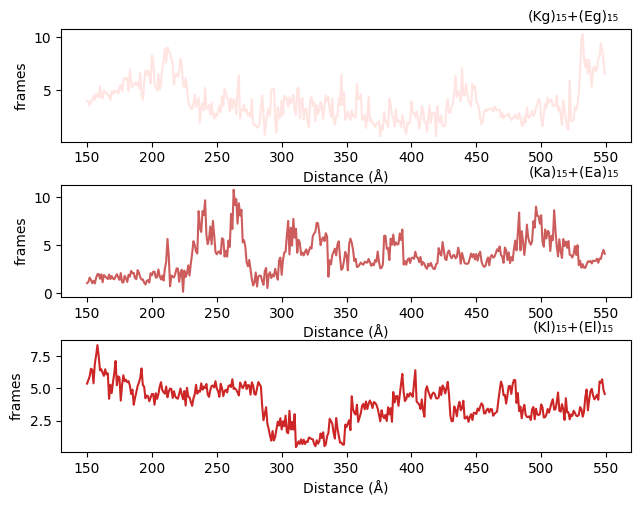

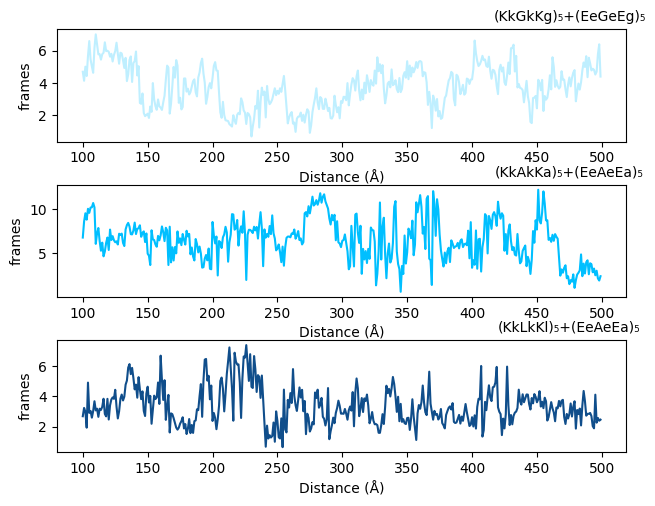

In [4]:
def main():
    labels = ['(Kg)₁₅+(Eg)₁₅','(Ka)₁₅+(Ea)₁₅','(Kl)₁₅+(El)₁₅','(KkGkKg)₅+(EeGeEg)₅','(KkAkKa)₅+(EeAeEa)₅','(KkLkKl)₅+(EeAeEa)₅']
    strands=["OA","OB"]
    colors = ["#FFE4E1","#CD5C5C","#CD2626","#BFEFFF","#00BFFF","#104E8B"]
    data=[]
    
    for i in range(6):
        tmp = pd.read_csv(str(i)+"_com_dist.out",delim_whitespace=True,header=None)
        tmp = tmp[2]
        if i>2:
            tmp2 = pd.read_csv(str(i)+"_com_dist2.out",delim_whitespace=True,header=None)
            tmp2 = tmp2[2]
            tmp =  pd.Series([*tmp, *tmp2])
        data.append(tmp.tail(400))#.iloc[:,1:4:2]
    
    time_plot(data[0:3],3,labels[0:3],colors[0:3], 'frames','Distance (Å)')
    time_plot(data[3:6],3,labels[3:6],colors[3:6], 'frames','Distance (Å)')
    
main()        

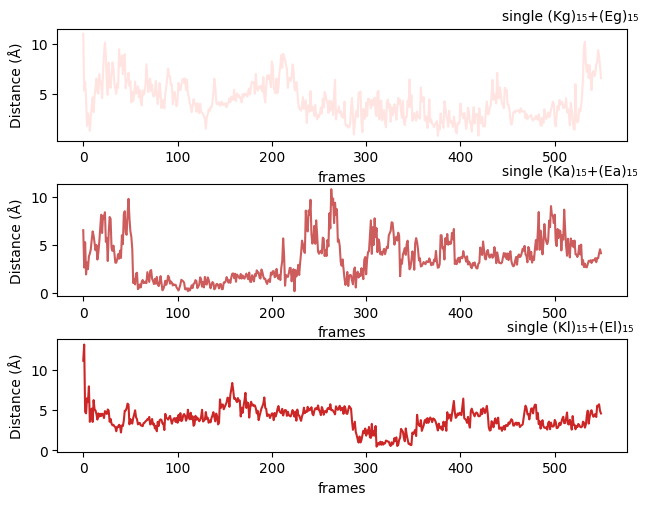

In [109]:
figure, axis = plt.subplots(3)
figure.tight_layout(pad=1.0)

for i in range(3):
    axis[i].plot(data[i], color=peptide_colors[i])
    axis[i].set_title('single '+x_labels[i],fontsize=10, x=0.90, y=1.0)
    axis[i].set_ylabel('Distance (Å)')
    axis[i].set_xlabel('frames')
#plt.savefig("COM_timeseries1.png",dpi=600)

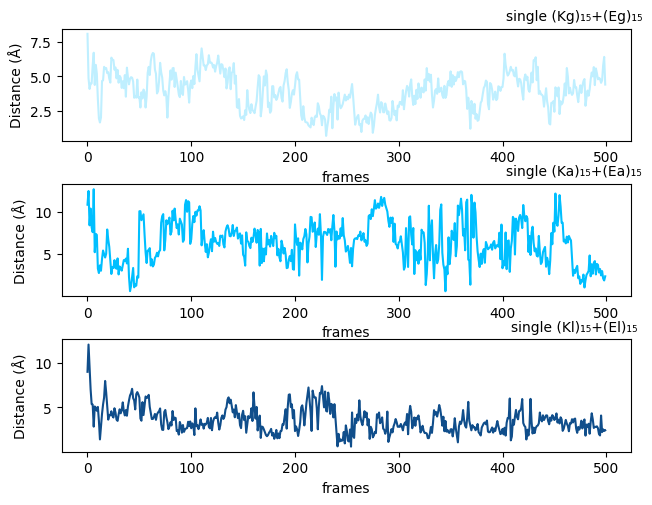

In [107]:
figure, axis = plt.subplots(3)
figure.tight_layout(pad=1.0)

for i in range(3):
    axis[i].plot(data[i+3], color=peptide_colors[i+3])
    axis[i].set_title('single '+x_labels[i],fontsize=10, x=0.90, y=1.0)
    axis[i].set_ylabel('Distance (Å)')
    axis[i].set_xlabel('frames')
#plt.savefig("COM_timeseries2.png",dpi=600)

ERROR: STE NOT GENERATED FOR SYS 0
ERROR: STE NOT GENERATED FOR SYS 1
ERROR: STE NOT GENERATED FOR SYS 2


/Users/themightypotato/miniconda3/lib/python3.8/site-packages/pyblock/pd_utils.py:165: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (name, col) in iterator:
/Users/themightypotato/miniconda3/lib/python3.8/site-packages/pyblock/pd_utils.py:165: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (name, col) in iterator:
/Users/themightypotato/miniconda3/lib/python3.8/site-packages/pyblock/pd_utils.py:165: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (name, col) in iterator:
/Users/themightypotato/miniconda3/lib/python3.8/site-packages/pyblock/pd_utils.py:165: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (name, col) in iterator:
/Users/themightypotato/miniconda3/lib/python3.8/site-packages/pyblock/pd_utils.py:165: FutureWarning: iteritems is deprecated an

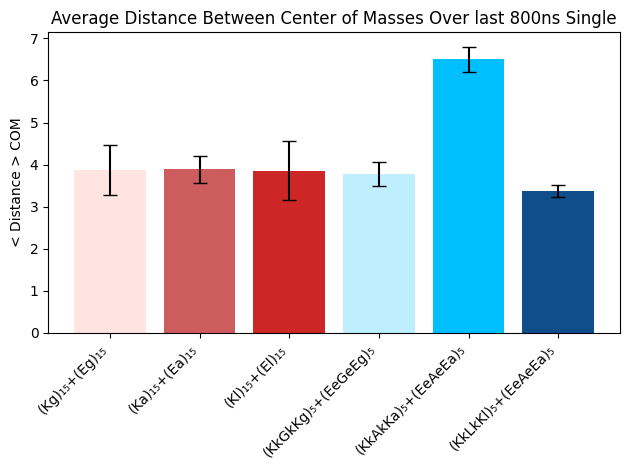

In [5]:
data_mean=np.zeros(6)
data_err=np.zeros(6)

for i in range(6):
    rand_data = data[i].tail(400)
    (data_length, reblock_data, covariance) = pyblock.pd_utils.reblock(rand_data)
    
    data_mean[i] = rand_data.mean()
    try:
        data_err[i] = pyblock.pd_utils.reblock_summary(reblock_data)["standard error"][0]
        #intraA_frac[i] = intraA_count[i]/500.0 #Same as mean whoops
    except:
        print("ERROR: STE NOT GENERATED FOR SYS",i)
        #data_err[i]=reblock_data.iloc[reblock_data.shape[0]-1][1]#ste
        data_err[i]=reblock_data.iloc[reblock_data.shape[0]-1].iloc[1]
plt.xticks(rotation=45,ha='right')
plt.ylabel('< Distance > COM')
plt.bar(x_labels,data_mean,color=peptide_colors,yerr=data_err,capsize=5)
plt.title("Average Distance Between Center of Masses Over last 800ns Single")
plt.tight_layout()
#plt.savefig("COM_single_400fr.png",dpi=600)